In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter("ignore")

<div class="main-title">
<h1>Geospatial data</h1>
<p>Introduction<p>
</div>

## Before we begin

We encorage you to check out the tutorial by Joris Van den Bossche  
[Introduction to geospatial data analysis with GeoPandas](https://github.com/jorisvandenbossche/geopandas-tutorial)  

<div class="center-content">
    <a href="https://t.ly/agtgJ">https://t.ly/agtgJ</a>
    <img src="../../assets/geospatial_intro.png" style="height: 300px; width: 300px; margin: auto;"/>
</div>

## What is this part for?

- introduce basic concepts related to geospatial data analysis
- build a common "vocabulary"
- understand geospatial libraries APIs

## How is it structured?
- intro to geopandas,
- shapely - geometry library,
- map projections and coordinate reference systems,
- grid systems,
- spatial operations.

## What is GeoPandas

- open source
- simplifies working with geospatial data
- extends pandas for spatial operations
- geometric operations - shapely
- fiona for file access and matplotlib for plotting

## Let's load some data

GeoPandas implements reading from a number of sources:
- files in formats supported by fiona
- PostGIS databases
- Feather and Parquet files

We'll be use a shapefile zip with countries from [Natural Earth](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)

## Read the shapefile

In [3]:
import geopandas as gpd
countries = gpd.read_file("data/ne_110m_admin_0_countries.zip")
countries = countries[["ISO_A3", "NAME", "CONTINENT", "POP_EST", "geometry"]]
countries.head(5)

,ISO_A3,NAME,CONTINENT,POP_EST,geometry
0,FJI,Fiji,Oceania,889953.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,Tanzania,Africa,58005463.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,W. Sahara,Africa,603253.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,Canada,North America,37589262.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,United States of America,North America,328239523.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## GeoDataFrames

- an extension of Pandas DataFrames
- consist of:
  - **geometries**: the column where spatial objects are stored
  - **properties**: the rest of the columns, describing the geometries

## Let's visualize it

We can use:
- `.plot()` to plot the geometries on a static map (matplotlib)
- `.explore()` to view them on an interactive map (Folium / Leaflet.js)

.plot()

<Axes: >

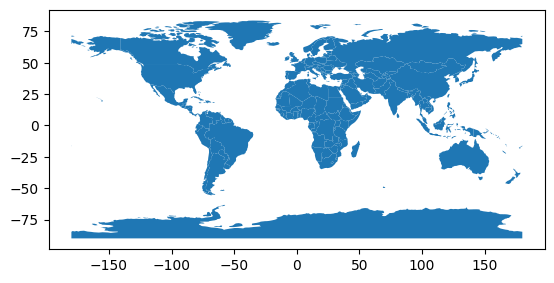

In [4]:
countries.plot()

.explore()

In [5]:
countries.explore()

## We are working with a DataFrame

In [6]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [7]:
import pandas as pd
isinstance(countries, pd.DataFrame)

True

In [8]:
countries.columns

Index(['ISO_A3', 'NAME', 'CONTINENT', 'POP_EST', 'geometry'], dtype='object')

## Pandas operations

In [9]:
countries['POP_EST'].mean()

43243457.74745763

In [10]:
countries['CONTINENT'].value_counts()

CONTINENT
Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

## The geometry column

In [11]:
type(countries["POP_EST"]), type(countries.geometry)

(pandas.core.series.Series, geopandas.geoseries.GeoSeries)

In [12]:
countries.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

## Calculating the area

In [13]:
countries.geometry.area

0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

<div class="alert alert-warning">
Note: Geopandas assumes 2D cartesian plane, so this is only valid when using a proper coordinate reference system.
</div>

## Let's go deeper - [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) objects
- GeoPandas uses Shapely - geometry column
- geometric operations

In [14]:
pl_gdf = countries[countries["NAME"] == "Poland"]
pl_gdf

,ISO_A3,NAME,CONTINENT,POP_EST,geometry
113,POL,Poland,Europe,37970874.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."


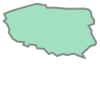

In [15]:
pl_geom = pl_gdf.iloc[0].geometry
pl_geom

In [16]:
type(pl_geom)

shapely.geometry.polygon.Polygon

## Geometry's properties

In [17]:
pl_geom.area

40.759230708989925

In [18]:
## minimum bounding region
pl_geom.bounds

(14.074521111719434, 49.02739533140962, 24.029985792748903, 54.85153595643291)

## Creating a geometry manually

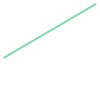

In [19]:
from shapely.geometry import LineString
bounds = pl_geom.bounds
line = LineString(
    [(bounds[0], bounds[1]),
    (bounds[2], bounds[3]),]
)
line

## View it

<Axes: >

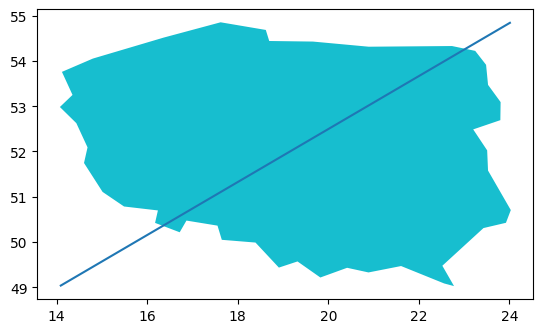

In [20]:
gpd.GeoSeries([line, pl_geom]).plot(cmap='tab10')

## Coordinate Reference Systems

A coordinate reference system (CRS) then defines how the two-dimensional, projected map in your GIS relates to real places on the earth.
For a detailed description, see e.g. https://docs.qgis.org/3.28/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

The topic **map projection** is very complex and even professionals who have studied geography, geodetics or any other GIS related science, often have problems with the correct definition of map projections and coordinate reference systems. Usually when you work with GIS, you already have projected data to start with. In most cases these data will be projected in a certain CRS, so you don’t have to create a new CRS or even re project the data from one CRS to another. That said, it is always useful to have an idea about what map projection and CRS means.

![Projection families](../../assets/projection_families.png)

### Geographic Coordinate Systems
The use of Geographic Coordinate Reference Systems is very common. They use degrees of latitude and longitude and sometimes also a height value to describe a location on the earth’s surface. The most popular is called WGS 84.
![Geographic coordinate system](../../assets/geographic_crs.png)

<div class="alert alert-success">
Note: Throughout the tutorial and the SRAI library, we default to the WGS 84 coordinate system.
</div>

## Projected coordinate reference systems
Another type of CRS is a projected coordinate reference system.
In this type of CRS (x,y) values often represent meters or feet, which makes it easier to work with e.g. when calculating distances or areas.
![Projected CRS](../../assets/projected_crs.png)

## CRS in Python

### Check crs in GeoPandas

In [21]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Let's fix Shapely plotting

The plotting didn't work in Shapely before because it interpreted degrees as cartesian coordinates. Let's fix that.

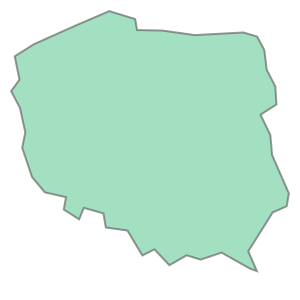

In [37]:
pl_geom_reprojected = pl_gdf.to_crs(2180).geometry.iloc[0]
pl_geom_reprojected

### Calculate area of Poland properly

The boundaries from the shapefile are not perfect but we should be able to get a rough estimate of the area using a proper CRS.

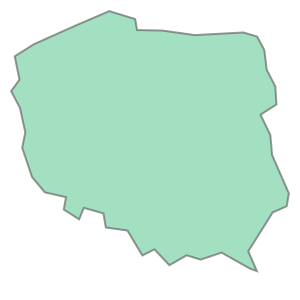

In [38]:
pl_geom_reprojected

In [43]:
area_km2 = pl_geom_reprojected.area / 10**6
print(f"Rough estimate of Poland's area: {area_km2:.2f} km2")

Rough estimate of Poland's area: 310191.98 km2


### What happens if we use .area in WGS 84?

In [46]:
pl_gdf.area

/var/folders/7b/wr2rfl6j5531jchlg49smllc0000gn/T/ipykernel_23340/3042336001.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pl_gdf.area


113    40.759231
dtype: float64

## Grid systems
- A tool to divide and index space
- Examples include [H3](https://github.com/uber/h3), [S2](https://s2geometry.io/about/), [Geohash](https://en.wikipedia.org/wiki/Geohash)

<div class="image-container">
    <figure>
      <img src="https://s2geometry.io/devguide/img/s2hierarchy.gif">
      <figcaption><a href="https://s2geometry.io/">S2</a></figcaption>
    </figure>
    <figure>
      <img src="https://h3geo.org/images/neighbors.png">
        <figcaption><a href="https://h3geo.org/docs/highlights/aggregation">H3</a></figcaption>
    </figure>
    <figure>
      <img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Geohash-grid.png">
      <figcaption><a href="https://h3geo.org/docs/highlights/aggregation">Geohash</a></figcaption>
    </figure>
</div>

## H3 - Hexagonal hierarchical geospatial indexing system
- hexagonal grid
- can be (approximately) subdivided into finer and finer hexagonal grids

## Spatial operations

<Axes: >

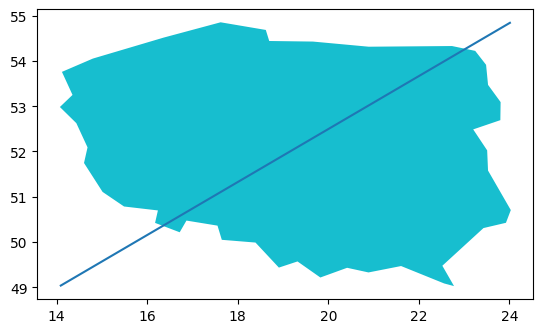

In [25]:
gpd.GeoSeries([line, pl_geom]).plot(cmap='tab10')

In [26]:
line.within(pl_geom)

False

In [27]:
line.intersects(pl_geom)

True

## Spatial operations on GeoDataFrames
You can use the same spatial operations as in Shapely, on entire GeoDataFrames.

In [28]:
pl_de_gdf = countries[countries["NAME"].isin(["Poland", "Germany"])]
pl_de_gdf

,ISO_A3,NAME,CONTINENT,POP_EST,geometry
113,POL,Poland,Europe,37970874.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
121,DEU,Germany,Europe,83132799.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


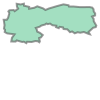

In [29]:
merged_geom = pl_de_gdf.unary_union
merged_geom

<Axes: >

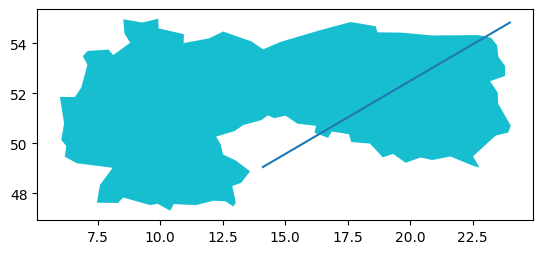

In [30]:
gpd.GeoSeries([line, merged_geom]).plot(cmap='tab10')

In [31]:
from srai.regionalizers import geocode_to_region_gdf, H3Regionalizer
from utils import CB_SAFE_PALLETE

regionized = H3Regionalizer(resolution=3).transform(pl_de_gdf)
regionized["intersects"] = regionized.intersects(line)
regionized.explore("intersects")

## Spatial joins

In [32]:
from srai.regionalizers import geocode_to_region_gdf, H3Regionalizer
from utils import CB_SAFE_PALLETE

prague_gdf = geocode_to_region_gdf("Prague, Czech Republic")
regionized = H3Regionalizer(resolution=7).transform(prague_gdf)
regionized.explore()

## Get bicycle data for Prague

In [33]:
from srai.loaders import OSMOnlineLoader

loader = OSMOnlineLoader()
prague_bikes = loader.load(prague_gdf, {"amenity": "bicycle_rental"})
prague_bikes.explore(tiles="CartoDB Positron")

## Perform the join

In [34]:
joint_gdf = regionized.sjoin(prague_bikes)
joint_gdf

,geometry,index_right,amenity
region_id,,,
871e35403ffffff,"POLYGON ((14.42488 50.12912, 14.42555 50.11723...",node/2710869649,bicycle_rental
871e354adffffff,"POLYGON ((14.37647 50.07291, 14.37716 50.06101...",node/6423051257,bicycle_rental
871e354adffffff,"POLYGON ((14.37647 50.07291, 14.37716 50.06101...",node/7724483398,bicycle_rental
871e3541dffffff,"POLYGON ((14.44305 50.11217, 14.44373 50.10028...",node/6466614391,bicycle_rental
871e35418ffffff,"POLYGON ((14.42691 50.09344, 14.42758 50.08154...",node/3401436639,bicycle_rental
871e3558bffffff,"POLYGON ((14.27151 50.10314, 14.27221 50.09125...",node/8043766186,bicycle_rental
871e354a0ffffff,"POLYGON ((14.27361 50.06747, 14.27431 50.05557...",node/2289555326,bicycle_rental
871e3541effffff,"POLYGON ((14.39260 50.09165, 14.39328 50.07975...",node/6742097486,bicycle_rental
871e3541effffff,"POLYGON ((14.39260 50.09165, 14.39328 50.07975...",node/7476047587,bicycle_rental


## Count bike stations

In [35]:
regionized.sjoin(prague_bikes).groupby("region_id").size()

region_id
871e35403ffffff    1
871e35416ffffff    1
871e35418ffffff    1
871e3541cffffff    1
871e3541dffffff    1
871e3541effffff    2
871e354a0ffffff    1
871e354a3ffffff    3
871e354adffffff    2
871e354aeffffff    1
871e3558bffffff    1
dtype: int64

## To sum up

- GeoPandas
    - Pandas spatial extension
    - very useful tool for working with geospatial data
    - used by SRAI internally
- Shapely
    - used by GeoPandas
    - implements geometries and spatial operations
- Coordinate reference systems
  - how the two-dimensional, projected map relates to real places on the earth
  - "basic" but non-trivial
- Grid systems
- Spatial operations
    - both on Shapely objects and GeoDataFrames
    - relationships such as `within`, `intersects`
    - spatial joins